<a href="https://colab.research.google.com/github/yg4236/yolov5custom/blob/main/YOLO_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) 

Mounted at /content/gdrive


In [9]:
%cd /content/
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 5636 (delta 89), reused 88 (delta 38), pack-reused 5476
Receiving objects: 100% (5636/5636), 8.45 MiB | 30.37 MiB/s, done.
Resolving deltas: 100% (3830/3830), done.


In [10]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 645kB 6.2MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [17]:
from IPython.display import Image
import os
from glob import glob

val_imgg_list = glob('/content/val/*.jpg')

val_img_path = val_imgg_list[0]

!python detect.py --weights /content/gdrive/MyDrive/best.pt --img 416 --conf 0.5 --source "{val_img_path}" --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=True, source='/content/val/1.jpg', update=False, view_img=False, weights=['/content/gdrive/MyDrive/best.pt'])
YOLOv5 🚀 v4.0-184-g9ccfa85 torch 1.8.1+cu101 CPU

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/val/1.jpg: 416x416 6 Problems, Done. (0.217s)
Results saved to runs/detect/exp4
1 labels saved to runs/detect/exp4/labels
Done. (0.237s)


In [40]:
f = open('/content/yolov5/runs/detect/exp4/labels/1.txt', 'r')
lines = f.readlines()
i=0
for line in lines:
    if i==2:
      break
    token = line.split(' ')
    print(token)
    i+=1
   
f.close()

['0', '0.709135', '0.22476', '0.389423', '0.185096\n']
['0', '0.294471', '0.276442', '0.391827', '0.288462\n']


['0', '0.294471', '0.276442', '0.391827', '0.288462\n']
122 114 163 120
122 285 114 234


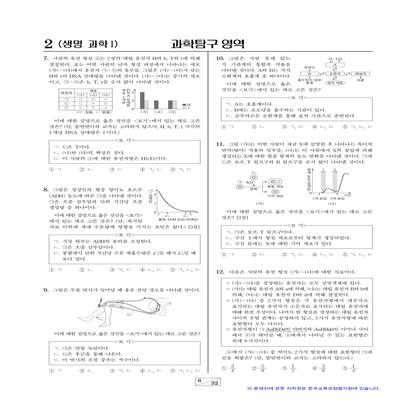

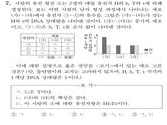

In [75]:
print(token)
x=float(token[1])
y=float(token[2])
w=float(token[3])
h=float(token[4])
x_int = int(x*1000)
y_int = int(y*1000)
w_int = int(w*1000)
h_int = int(h*1000)
x_pixel = int(x*416)
y_pixel = int(y*416)
w_pixel = int(w*416)
h_pixel = int(h*416)
print(x_pixel, y_pixel, w_pixel, h_pixel)
print(x_pixel, x_pixel+w_pixel, y_pixel, y_pixel+h_pixel)
# print(x_int,y_int, w_int,h_int)

# print(x_int,x_int+w_int, y_int,y_int+h_int)

import cv2
from google.colab.patches import cv2_imshow
src = cv2.imread("/content/val/1.jpg", cv2.IMREAD_COLOR)

# dst = src[y_pixel:y_pixel+h_pixel, x_pixel:x_pixel+w_pixel].copy()
dst = src[55:180, 38:205].copy()



cv2_imshow(src)
cv2_imshow(dst)


# cv2.waitKey()
# cv2.destroyAllWindows()